In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# lets use Q-Q plot to check the features follow normal distribution or not
import scipy.stats as stats #this module has functionality to plot the Q-Q plot

In [3]:
train = pd.read_csv("train.csv")
train.head(1)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Combined_asset_value
0,1676,5.0,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000,Approved,44300000


In [4]:
test=pd.read_csv("test.csv")
test.head(1)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Combined_asset_value
0,1704,5.0,Graduate,No,5400000.0,19700000.0,20.0,423,6500000.0,10000000.0,15700000.0,7300000.0,Rejected,39500000.0


In [5]:
#let remove loan_id feature that has not much useful
train.drop(columns=["loan_id"],inplace=True)
test.drop(columns=["loan_id"],inplace=True)

# key Points
###### before modelling we have to preprocessing that include
###### dropping duplicate,handling missing values(this step we performed in Descriptive analysis)
###### handling outliers,handling numerical data and handling categorical data 
###### checking features are normally distributed or not if not we convert using transformations or box-cox(if data is power-law and pareto)

# 1) lets drop duplicates

In [6]:
train.duplicated(keep='first').sum() #this duplicated of function ill give you series that tells Fase for first occurance True if data is duplicated
#duplictaed(by=[columns],keep=first)
#you can mention columns also that checks only those column values and consider that as duplicate if those column values repeated
#you can mention keep='first' means consider first record as non duplicate if other duplicate records as duplicates 

8

In [7]:
# we could see there are 8 duplicates if we consider all columns
train.shape

(3423, 13)

In [8]:
# now lets delete all those duplicates by keep only one occurance
train.drop_duplicates(keep='first',inplace=True)

In [9]:
train.shape #3423-8=3415 #we deleted that 8 duplicates

(3415, 13)

# Handling zero value and -ve values in numerical because log(0) is infinity and log(-ve) is undefined so to convert lognormal to normal we have to take care of zero values


# 2) lets handle outliers as well as lets check the distribution of data

no_of_dependents
income_annum
loan_amount
loan_term
cibil_score
residential_assets_value
commercial_assets_value
luxury_assets_value
bank_asset_value
Combined_asset_value


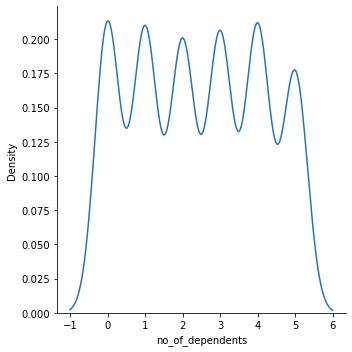

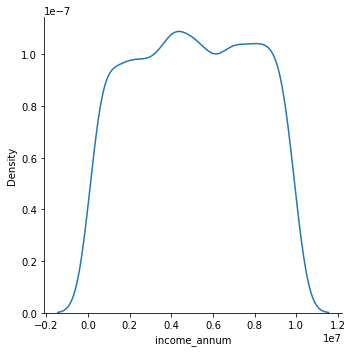

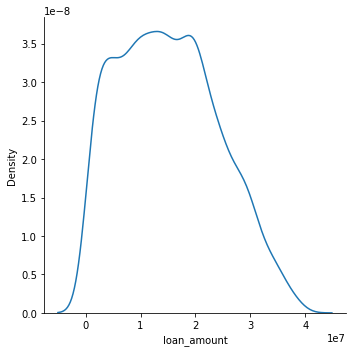

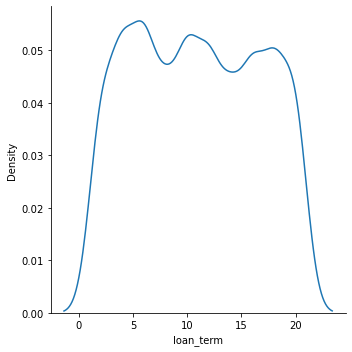

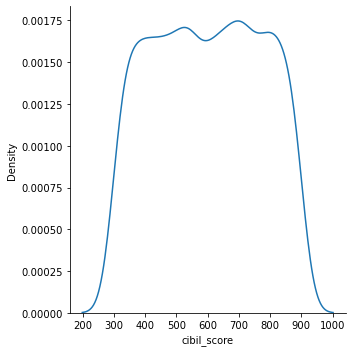

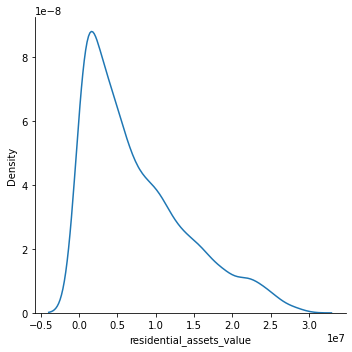

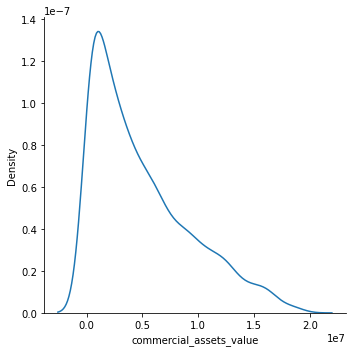

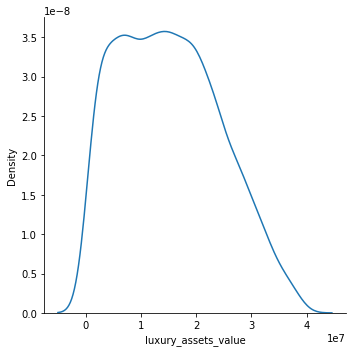

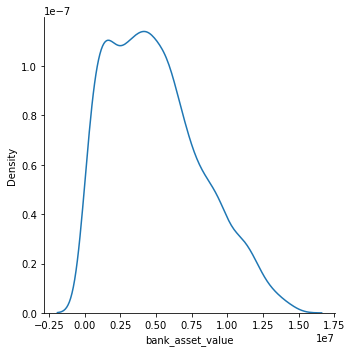

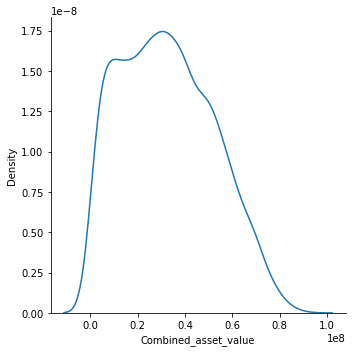

In [10]:
for i in train.describe().columns:
    print(i)
    sns.displot(train[i],kind="kde")
#all features approximately follows the uniform distribution and in this distribution there will be no outliers

In [11]:
for i in train.describe().columns:
    train[i]=np.where(train[i]<=0,train[i].median(),train[i])
#this will convert where ever you find 0 in numerical value covert with medain value if not keep value as it is

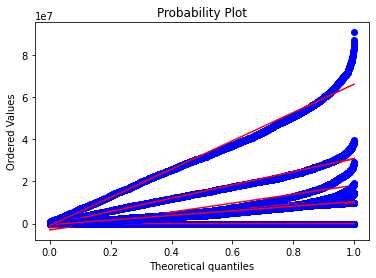

In [12]:
for i in train.describe().columns:
    stats.probplot(train[i],dist=stats.uniform,sparams=(0,1),plot=plt) #we could say all features follows a uniform distribution
#no outliers will be there in uniform distribution

# 3) lets handle categorical_data and numerical_data

In [13]:
for i in train.describe().columns:
    model=StandardScaler().fit(np.array(train[i]).reshape(-1,1))
    train[i]=model.transform(np.array(train[i]).reshape(-1,1))
    test[i]=model.transform(np.array(test[i]).reshape(-1,1))


In [14]:
train.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Combined_asset_value
0,1.682907,Not Graduate,No,1.009337,1.625769,-0.859634,-0.187401,-0.273596,2.060092,0.077827,1.16172,Approved,0.601581


In [15]:
test.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Combined_asset_value
0,1.682907,Graduate,No,0.11957,0.499896,1.588782,-1.029623,-0.165381,1.152397,0.05602,0.727087,Rejected,0.355772


# 4) lets handle Categorical Data

In [16]:
#lets Convert our output variable into 0 and 1
train["loan_status"]=train["loan_status"].map({" Approved":1," Rejected":0})
test["loan_status"]=test["loan_status"].map({" Approved":1," Rejected":0})

In [17]:
# lets do the response labelling for education feature
p_0_Graduate=np.sum((train["education"]==" Graduate")&(train["loan_status"]==0))/np.sum(train["education"]==" Graduate")
p_1_Graduate=np.sum((train["education"]==" Graduate")&(train["loan_status"]==1))/np.sum(train["education"]==" Graduate")
p_0_not_Graduate=np.sum((train["education"]==" Not Graduate")&(train["loan_status"]==0))/np.sum(train["education"]==" Not Graduate")
p_1_not_Graduate=np.sum((train["education"]==" Not Graduate")&(train["loan_status"]==1))/np.sum(train["education"]==" Not Graduate")


In [18]:
train["p_0_education"]=train["education"].map({" Graduate":p_0_Graduate," Not Graduate":p_0_not_Graduate})
train["p_1_education"]=train["education"].map({" Graduate":p_1_Graduate," Not Graduate":p_1_not_Graduate})
test["p_0_education"]=test["education"].map({" Graduate":p_0_Graduate," Not Graduate":p_0_not_Graduate})
test["p_1_education"]=test["education"].map({" Graduate":p_1_Graduate," Not Graduate":p_1_not_Graduate})

In [19]:
# lets do the response labelling for self_employed feature
p_0_self_employed_yes=np.sum((train["self_employed"]==" Yes")&(train["loan_status"]==0))/np.sum(train["self_employed"]==" Yes")
p_1_self_employed_yes=np.sum((train["self_employed"]==" Yes")&(train["loan_status"]==1))/np.sum(train["self_employed"]==" Yes")
p_0_self_employed_no=np.sum((train["self_employed"]==" No")&(train["loan_status"]==0))/np.sum(train["self_employed"]==" No")
p_1_self_employed_no=np.sum((train["self_employed"]==" No")&(train["loan_status"]==1))/np.sum(train["self_employed"]==" No")

In [20]:
train["p_0_self_employed"]=train["self_employed"].map({" Yes":p_0_self_employed_yes," No":p_0_self_employed_no})
train["p_1_self_employed"]=train["self_employed"].map({" Yes":p_1_self_employed_yes," No":p_1_self_employed_no})
test["p_0_self_employed"]=test["self_employed"].map({" Yes":p_0_self_employed_yes," No":p_0_self_employed_no})
test["p_1_self_employed"]=test["self_employed"].map({" Yes":p_1_self_employed_yes," No":p_1_self_employed_no})


In [21]:
#no lets drop the categorical variables
train.drop(columns=["education","self_employed"],inplace=True)
test.drop(columns=["education","self_employed"],inplace=True)

In [22]:
train.head(1)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Combined_asset_value,p_0_education,p_1_education,p_0_self_employed,p_1_self_employed
0,1.682907,1.009337,1.625769,-0.859634,-0.187401,-0.273596,2.060092,0.077827,1.16172,1,0.601581,0.376179,0.623821,0.380726,0.619274


In [23]:
test.head(1)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Combined_asset_value,p_0_education,p_1_education,p_0_self_employed,p_1_self_employed
0,1.682907,0.11957,0.499896,1.588782,-1.029623,-0.165381,1.152397,0.05602,0.727087,0,0.355772,0.382199,0.617801,0.380726,0.619274


In [24]:
train.to_csv("train_for_modelling.csv",index=False)
test.to_csv("test_for_modelling.csv",index=False)